In [76]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math

dataFile=('energydata_complete.csv')
timedata = pd.read_csv(dataFile, index_col='date',parse_dates=True, infer_datetime_format=True)

In [77]:
#Add Additional columns for working with later.
timedata['Weekday Name']=timedata.index.day_name('English')
timedata['Hour']=timedata.index.hour
#Preview
timedata

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Weekday Name,Hour
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Monday,17
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Monday,17
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Monday,17
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Monday,17
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Monday,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,Friday,17
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,Friday,17
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,Friday,17


Text(0.5, 1.0, 'Appliance Energy Usage Over Time')

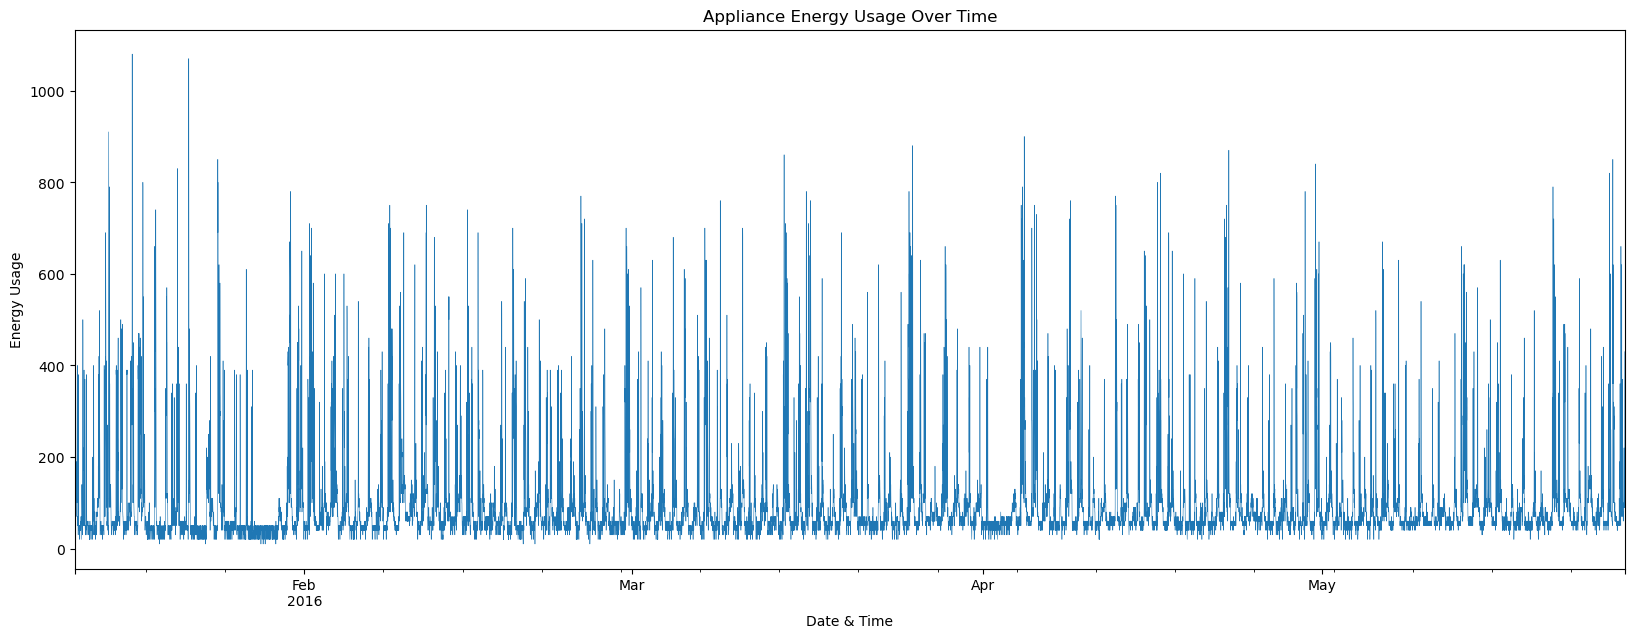

In [78]:
#Task 1a
ax = timedata['Appliances'].plot(linewidth=0.4, figsize=(20,7))
ax.set_ylabel('Energy Usage')
ax.set_xlabel('Date & Time')
ax.set_title('Appliance Energy Usage Over Time')


Text(0.5, 1.0, 'Appliance Energy Usage for the Week of 6/17/16')

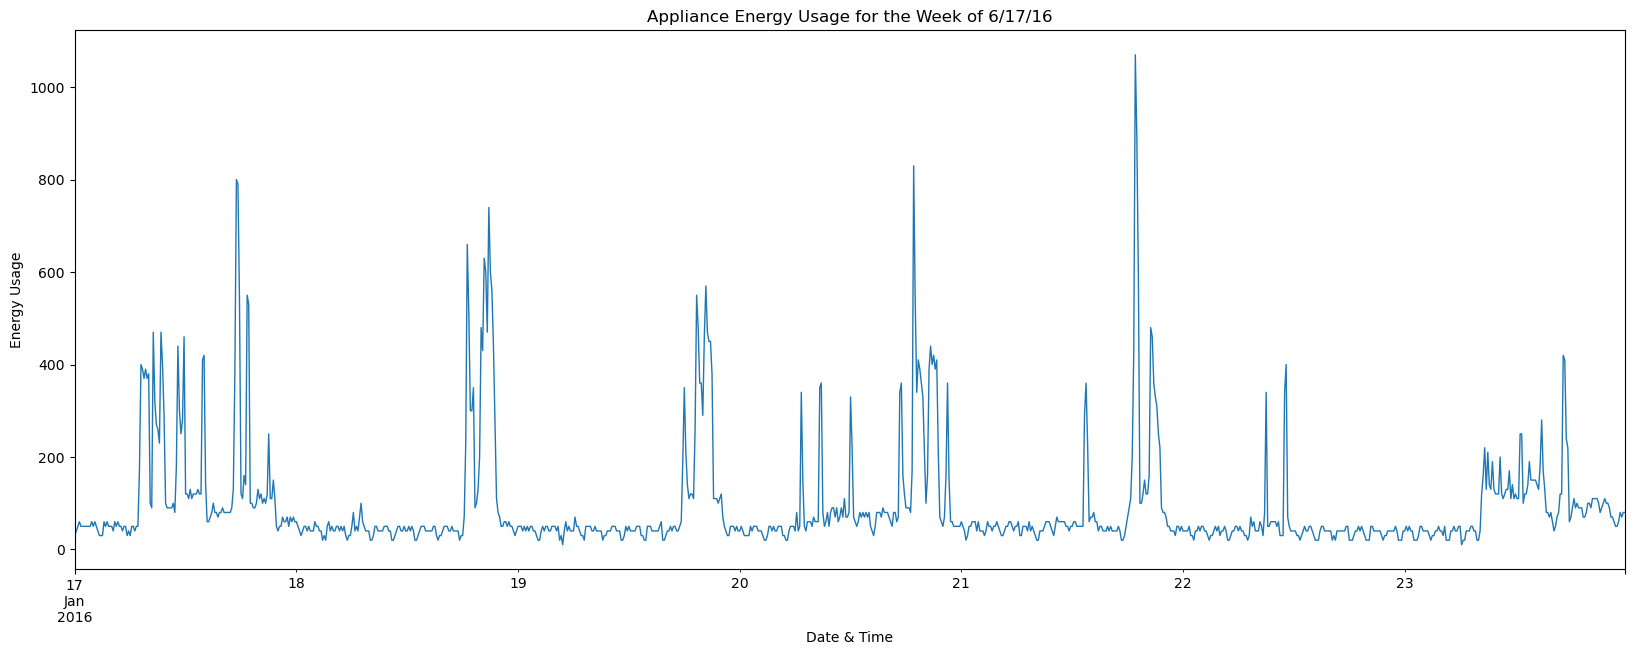

In [79]:
#Task 1b - Week of 
ax = timedata.loc['2016-01-17':'2016-01-23','Appliances'].plot(linewidth=1, figsize=(20,7))
ax.set_ylabel('Energy Usage')
ax.set_xlabel('Date & Time')
ax.set_title('Appliance Energy Usage for the Week of 6/17/16')


In [80]:
#Task 2
heatmapCols=['Weekday Name','Hour','Appliances']
energyWeek=timedata.loc['2016-01-17':'2016-01-23',heatmapCols]
grouped=pd.pivot_table(energyWeek,values='Appliances',index=['Hour'],columns=['Weekday Name'],aggfunc=np.sum,sort=False)
#Preview Table
grouped

Weekday Name,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Hour,,,,,,,
0,280,270,280,220,250,240,260
1,310,260,270,270,330,220,190
2,260,260,200,190,250,230,210
3,300,250,280,260,300,240,230
4,310,270,200,250,240,220,180
5,260,200,270,230,310,230,260
6,270,330,280,700,270,230,180
7,2090,330,250,320,280,270,240
8,1630,210,250,960,190,300,690


['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


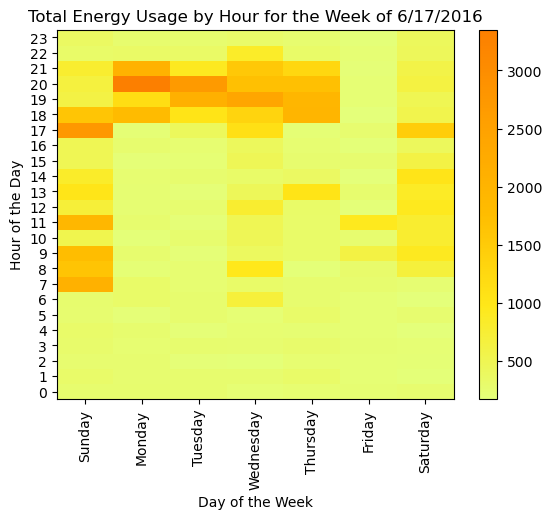

In [81]:
mapCols = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
mapRows= [i for i in range(24)]
print(mapCols)
print(mapRows)

heatmap=plt.pcolor(grouped,cmap='Wistia')
plt.ylabel('Hour of the Day')
plt.xlabel('Day of the Week')
plt.title('Total Energy Usage by Hour for the Week of 6/17/2016')
plt.yticks(np.arange(0.5, len(grouped.index), 1), grouped.index)
plt.xticks(np.arange(0.5, len(grouped.columns), 1), grouped.columns,rotation=90)
plt.colorbar()
plt.show()

<AxesSubplot: title={'center': 'Energy Usage Frequency'}, ylabel='Frequency'>

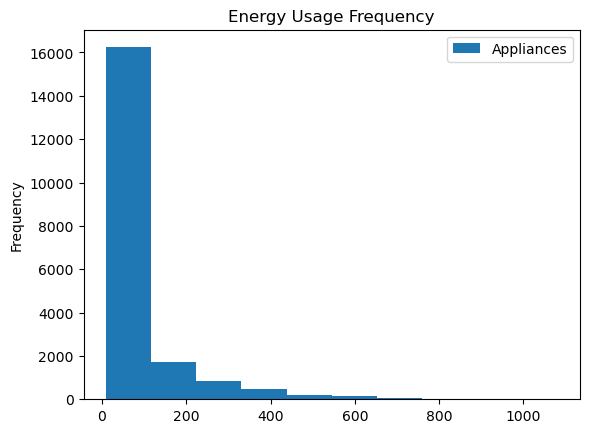

In [82]:
#Task 3
#timedata.hist(column=['Appliances'])
timedata.plot(kind='hist',y='Appliances',title='Energy Usage Frequency')

In [83]:
#Task 4
def nsm(hhmmss):
    [hours, minutes, seconds] = [int(x) for x in hhmmss.split(':')]
    x=datetime.timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return x.seconds

In [84]:
hhmmss = '02:29:14'
y=nsm(hhmmss)
print(y)

8954


In [85]:
timedata['DateTime']=pd.to_datetime(timedata.index)
timedata['DateTime']=timedata['DateTime'].dt.strftime('%H:%M:%S')
timedata

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Weekday Name,Hour,DateTime
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Monday,17,17:00:00
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Monday,17,17:10:00
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Monday,17,17:20:00
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Monday,17,17:30:00
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Monday,17,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,Friday,17,17:20:00
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,Friday,17,17:30:00
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,Friday,17,17:40:00


In [86]:
timedata['NSM']=timedata['DateTime'].map(nsm)
timedata

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Weekday Name,Hour,DateTime,NSM
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,Monday,17,17:00:00,61200
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,Monday,17,17:10:00,61800
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,Monday,17,17:20:00,62400
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,Monday,17,17:30:00,63000
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,Monday,17,17:40:00,63600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,Friday,17,17:20:00,62400
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,Friday,17,17:30:00,63000
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,Friday,17,17:40:00,63600


<AxesSubplot: title={'center': 'Average Energy Usage v. Seconds to Midnight'}, xlabel='Seconds to Midnight', ylabel='Average Appliance Energy Usage'>

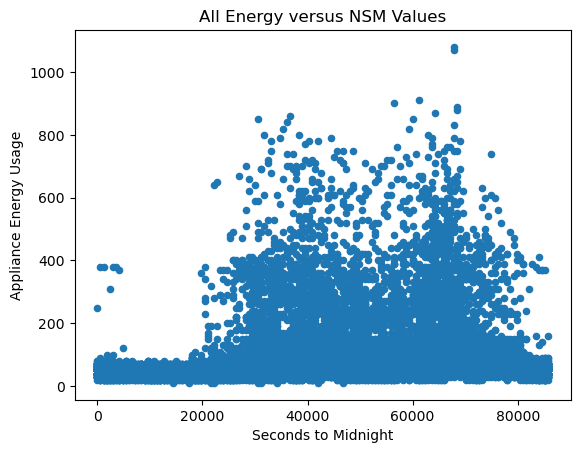

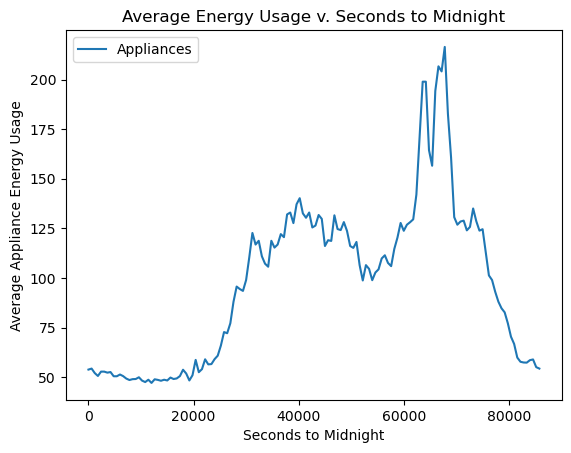

In [87]:
energyNSM=timedata.loc[:,['Appliances', 'NSM']]
energyNSM.plot(x='NSM',y='Appliances',kind='scatter',title='All Energy versus NSM Values', ylabel='Appliance Energy Usage',xlabel='Seconds to Midnight')
byNSM=pd.pivot_table(energyNSM,values='Appliances',index=['NSM'],aggfunc=np.mean,sort=True)
byNSM.plot(kind='line',ylabel='Average Appliance Energy Usage', title='Average Energy Usage v. Seconds to Midnight',xlabel='Seconds to Midnight')


<AxesSubplot: title={'center': 'Average Energy versus Pressure Values'}, xlabel='Atmospheric Pressure', ylabel='Average Appliance Energy Usage'>

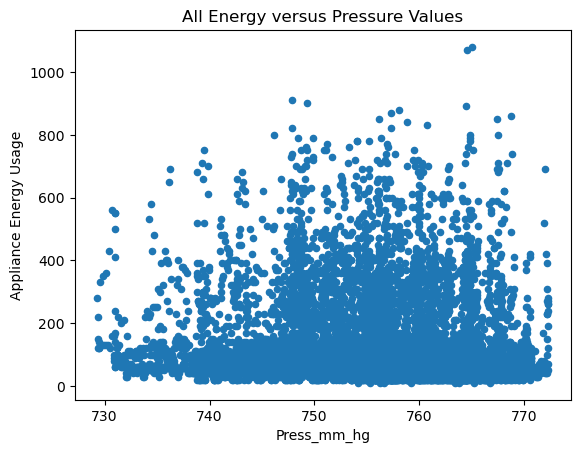

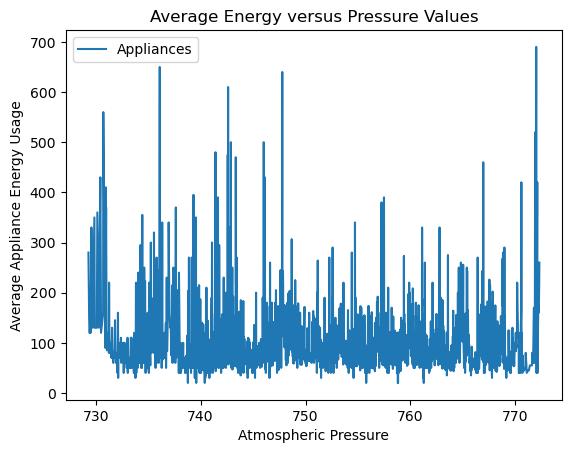

In [88]:
#Task 5
energyPressure=timedata.loc[:,['Appliances', 'Press_mm_hg']]
energyPressure.plot(x='Press_mm_hg',y='Appliances',kind='scatter',title='All Energy versus Pressure Values', ylabel='Appliance Energy Usage')
byPressure=pd.pivot_table(energyPressure,values='Appliances',index=['Press_mm_hg'],aggfunc=np.mean,sort=True)
byPressure.plot(kind='line',use_index=True,ylabel='Average Appliance Energy Usage',xlabel='Atmospheric Pressure',title='Average Energy versus Pressure Values')


In [89]:
#Task 6
#The relationship between NSm and energy consumption is clear. Energy consumption appears to be a biomodal distribution, with a peak at mid-day and a peak at night. The most energy-intensive appliances used daily in a household are related to cooking (ovens, microwaves, refrigerators, freezers, dishwashers), so
#dinner prep for the mid-day and evening meals could induce spikes in energy consumption. On the other hand, appliance usage drops to almost zero during the time that most people are sleeping.
#
#The relationship seems less clear with pressure. It seems that there is a trend towards higher appliance usage at lower pressures. Lower pressures may be related to adverse weather events that keep people indoors and lead them to use more energy.